#### Dataset Directory

In [1]:
import os

os.makedirs("../datasets", exist_ok=True)

In [2]:
import os
from google.colab import files
import shutil

os.makedirs("/content/datasets", exist_ok=True)
os.makedirs("/root/.kaggle", exist_ok=True)

uploaded = files.upload()

shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)
print("kaggle.json uploaded and configured successfully.")

Saving kaggle.json to kaggle.json
kaggle.json uploaded and configured successfully.


#### Dataset Downloads

In [3]:
import kaggle

normal_tb_url = 'tawsifurrahman/tuberculosis-tb-chest-xray-dataset'
pneu_opac_normal_url = 'fatemehmehrparvar/lung-disease'

print(f"Downloading Pneumonia Opacity Normal Dataset.....")
kaggle.api.dataset_download_files(pneu_opac_normal_url, path='../datasets', unzip=True)
print(f"Downloading Normal TB Dataset.....")
kaggle.api.dataset_download_files(normal_tb_url, path="../datasets", unzip=True)

Dataset URL: https://www.kaggle.com/datasets/fatemehmehrparvar/lung-disease
Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset


#### Rearranging Dataaset Directory

In [4]:
os.makedirs("../Final Dataset")

In [5]:
# Lung X-Ray Image Directory Manipulation
print(os.listdir("../datasets/Lung X-Ray Image/Lung X-Ray Image"))
sub_dir_1 = "../datasets/Lung X-Ray Image/Lung X-Ray Image"
dest_dir = "../Final Dataset/Lung X-Ray Images"

os.rename(src=sub_dir_1, dst=dest_dir)
print("Moved Lung X-Ray Image Directory Successfully")

['Viral Pneumonia', 'Lung_Opacity', 'Normal']
Moved Lung X-Ray Image Directory Successfully


In [6]:
# TB_Chest_Radiograph_Database

src_dir = "../datasets/TB_Chest_Radiography_Database"
dest_dir = "../Final Dataset/TB Dataset"

os.rename(src_dir, dest_dir)
print("Moved Successfully")

Moved Successfully


In [7]:
import shutil
shutil.move(src="../Final Dataset/TB Dataset/Tuberculosis", dst="../Final Dataset/")

'../Final Dataset/Tuberculosis'

In [8]:
# Define paths
parent_dir = "../Final Dataset"
sub_dir = os.path.join(parent_dir, "Lung X-Ray Images")

# List all folders in the subdirectory
for item in os.listdir(sub_dir):
    src = os.path.join(sub_dir, item)
    dst = os.path.join(parent_dir, item)
    if os.path.isdir(src):
        shutil.move(src, dst)
        print(f"Moved {item} to {parent_dir}")

print("Moved Successfully")


Moved Viral Pneumonia to ../Final Dataset
Moved Lung_Opacity to ../Final Dataset
Moved Normal to ../Final Dataset
Moved Successfully


In [9]:
# Deleting datasets folder
dirs_to_remove = ['../datasets', '../Final Dataset/TB Dataset', '../Final Dataset/Lung X-Ray Images']

for d in dirs_to_remove:
    shutil.rmtree(d)


#### Info about Final Dataset

In [10]:
print(f"Directories in Final Dataset are {os.listdir('../Final Dataset')}")

Directories in Final Dataset are ['Viral Pneumonia', 'Tuberculosis', 'Lung_Opacity', 'Normal']


In [11]:
dir_path = "../Final Dataset"
dirs = os.listdir(dir_path)

file_counts = {}
for d in dirs:
    folder_path = os.path.join(dir_path, d)
    if os.path.isdir(folder_path):
        file_count = sum(
            1 for entry in os.listdir(folder_path)
            if os.path.isfile(os.path.join(folder_path, entry))
        )

        file_counts[d]=file_count

file_counts

{'Viral Pneumonia': 1100,
 'Tuberculosis': 700,
 'Lung_Opacity': 1125,
 'Normal': 1250}

In [13]:
import os
from PIL import Image

# Path to your dataset
dir_path = "../Final Dataset"

# List all subfolders (classes)
dirs = [d for d in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, d))]

file_counts = {}
image_properties = {}

# Loop through each class folder
for d in dirs:
    folder_path = os.path.join(dir_path, d)
    files = [
        f for f in os.listdir(folder_path)
        if os.path.isfile(os.path.join(folder_path, f))
    ]

    # Count files
    file_counts[d] = len(files)

    # Extract image properties (size, mode)
    sizes = []
    modes = []

    for f in files[:50]:  # check first 50 images to speed up
        img_path = os.path.join(folder_path, f)
        try:
            img = Image.open(img_path)
            sizes.append(img.size)  # (width, height)
            modes.append(img.mode)  # 'L' (grayscale), 'RGB', etc.
        except:
            continue

    image_properties[d] = {
        "unique_sizes": set(sizes),
        "unique_modes": set(modes),
        "example_size": sizes[0] if sizes else None,
        "example_mode": modes[0] if modes else None,
    }

file_counts, image_properties


({'Viral Pneumonia': 1100,
  'Tuberculosis': 700,
  'Lung_Opacity': 1125,
  'Normal': 1250},
 {'Viral Pneumonia': {'unique_sizes': {(299, 299)},
   'unique_modes': {'RGB'},
   'example_size': (299, 299),
   'example_mode': 'RGB'},
  'Tuberculosis': {'unique_sizes': {(512, 512)},
   'unique_modes': {'L', 'RGB'},
   'example_size': (512, 512),
   'example_mode': 'L'},
  'Lung_Opacity': {'unique_sizes': {(299, 299)},
   'unique_modes': {'RGB'},
   'example_size': (299, 299),
   'example_mode': 'RGB'},
  'Normal': {'unique_sizes': {(299, 299)},
   'unique_modes': {'RGB'},
   'example_size': (299, 299),
   'example_mode': 'RGB'}})

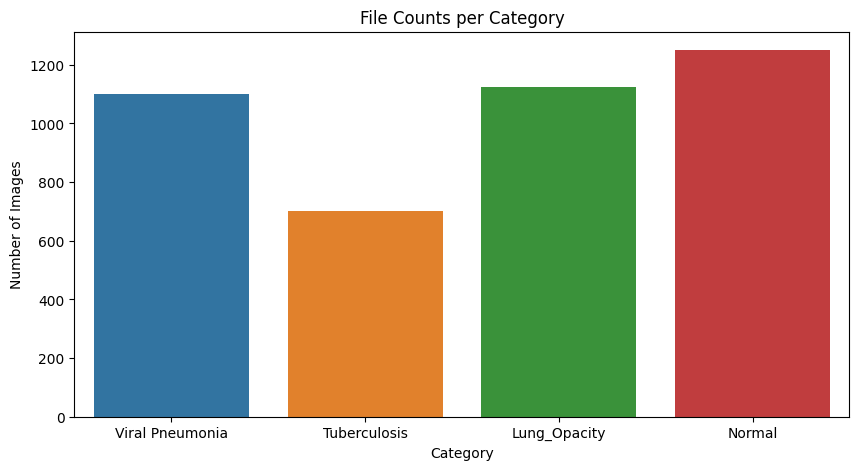

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame for plotting

# Plot using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=file_counts.keys(), y=file_counts.values(), hue=file_counts.keys())
plt.title('File Counts per Category')
plt.ylabel('Number of Images')
plt.xlabel('Category')
plt.show()

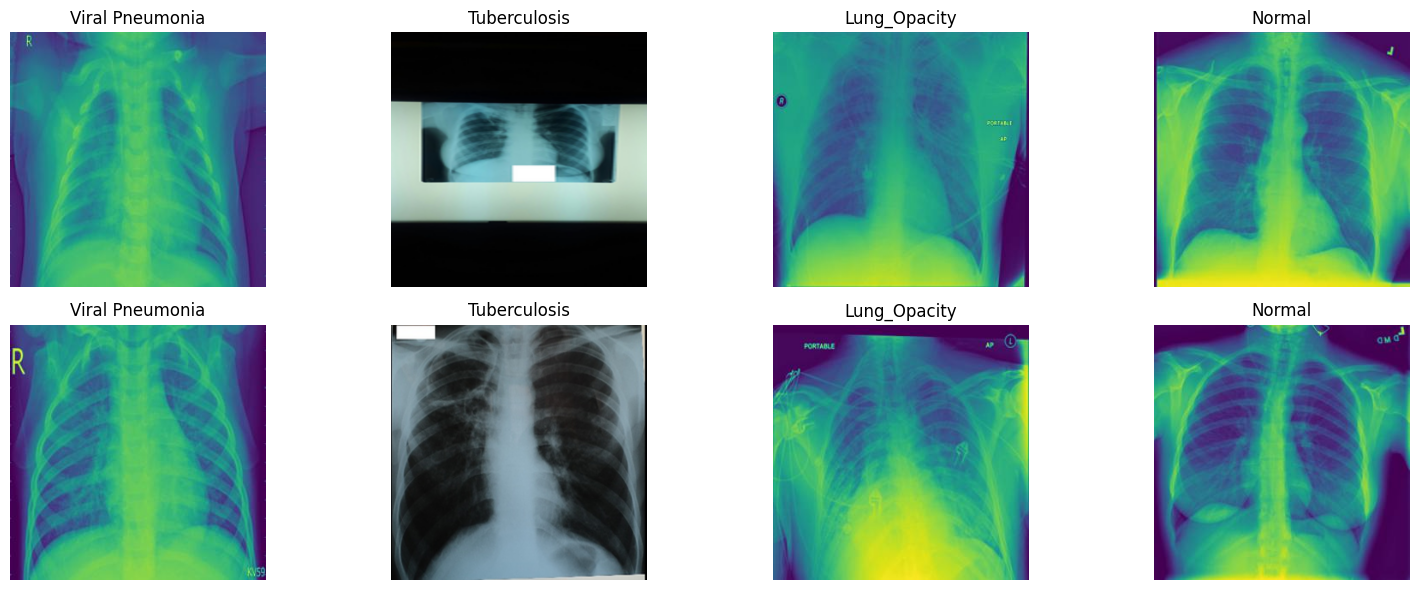

In [14]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

categories = dirs  # ['Lung_Opacity', 'Normal', 'Tuberculosis', 'Viral Pneumonia']
dir_path = '../Final Dataset'  # Dataset Directory

fig, axes = plt.subplots(2, 4, figsize=(16, 6))

for i, category in enumerate(categories):
    folder = os.path.join(dir_path, category)
    images = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
    sample_imgs = random.sample(images, 2) if len(images) >= 2 else images
    for j, img_name in enumerate(sample_imgs):

        ax = axes[j, i]
        img_path = os.path.join(folder, img_name)
        img = mpimg.imread(img_path)
        ax.imshow(img, cmap='gray')
        ax.set_title(f"{category}")
        ax.axis('off')

    for j in range(len(sample_imgs), 2):
        axes[j, i].axis('off')

plt.tight_layout()
plt.show()


#### Importing required modules

In [15]:
!pip install tensorflow
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Splitting Dataset into Train Test Validation

In [16]:
!pip install split-folders
import splitfolders

splitfolders.ratio(
    "../Final Dataset",
    output="../Final Dataset Split",
    seed=42,
    ratio=(.7, .2, .1),
    move=False  # Set to  move files instead of copying
)

Copying files: 4175 files [00:00, 7453.37 files/s]


#### Data Augmentation

In [17]:
parent_dir = "../Final Dataset Split"

image_dims = (224, 224)
batch_size = 32

# Train Data Augmentation
train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create the generators
train_generator = train_data.flow_from_directory(
    directory=os.path.join(parent_dir, 'train'),
    target_size=image_dims,
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    directory=os.path.join(parent_dir, 'val'),
    target_size=image_dims,
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    directory=os.path.join(parent_dir, 'test'),
    target_size=image_dims,
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2921 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Found 419 images belonging to 4 classes.


In [18]:
train_generator.class_indices

{'Lung_Opacity': 0, 'Normal': 1, 'Tuberculosis': 2, 'Viral Pneumonia': 3}

In [19]:
parent_path = "../Final Dataset Split"
dirs = os.listdir(parent_path)
for dir in dirs:
    sub_dir = os.path.join(parent_path, dir)
    folders = os.listdir(sub_dir)
    file_counts = {}
    for f in folders:
        folder_path = os.path.join(f"../Final Dataset Split/{dir}", f)
        if os.path.isdir(folder_path):
            file_count = sum(
                1 for entry in os.listdir(folder_path)
                if os.path.isfile(os.path.join(folder_path, entry))
            )

            file_counts[f]=file_count

    print(f"{dir} has {file_counts}")

train has {'Viral Pneumonia': 770, 'Tuberculosis': 489, 'Lung_Opacity': 787, 'Normal': 875}
val has {'Viral Pneumonia': 220, 'Tuberculosis': 140, 'Lung_Opacity': 225, 'Normal': 250}
test has {'Viral Pneumonia': 110, 'Tuberculosis': 71, 'Lung_Opacity': 113, 'Normal': 125}


#### Model Building

In [20]:
model_path = "../code files/trained_model.keras"

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [22]:
# Load MobileNetV2 without the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
predictions = Dense(4, activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(train_generator, epochs=3, verbose=1,
          validation_data=val_generator, callbacks=callbacks_list)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.2940 - loss: 1.6202
Epoch 1: val_accuracy improved from -inf to 0.59281, saving model to ../code files/trained_model.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 82s 706ms/step - accuracy: 0.2950 - loss: 1.6179 - val_accuracy: 0.5928 - val_loss: 1.0119
Epoch 2/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.6023 - loss: 0.9814
Epoch 2: val_accuracy improved from 0.59281 to 0.76527, saving model to ../code files/trained_model.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 427ms/step - accuracy: 0.6026 - loss: 0.9806 - val_accuracy: 0.7653 - val_loss: 0.7194
Epoch 3/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.7351 - loss: 0.7165
Epoch 3: val_accuracy improved from 0.76527 to 0.81198, saving model to ../code files/trained_model.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 431ms/step - accuracy: 0.7353 - loss: 0.7161 - val_accuracy: 0.8120 - val_loss: 0.5779


In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

target_names = list(test_generator.class_indices.keys())  # class names
report = classification_report(y_true, y_pred, target_names=target_names)
print("Classification Report:\n", report)

accuracy = np.sum(y_pred == y_true) / len(y_true)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step
Classification Report:
                  precision    recall  f1-score   support

   Lung_Opacity       0.85      0.71      0.77       113
         Normal       0.69      0.82      0.75       125
   Tuberculosis       1.00      1.00      1.00        71
Viral Pneumonia       0.83      0.78      0.80       110

       accuracy                           0.81       419
      macro avg       0.84      0.83      0.83       419
   weighted avg       0.82      0.81      0.81       419

Test Accuracy: 81.15%


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step
Overall Accuracy: 0.81


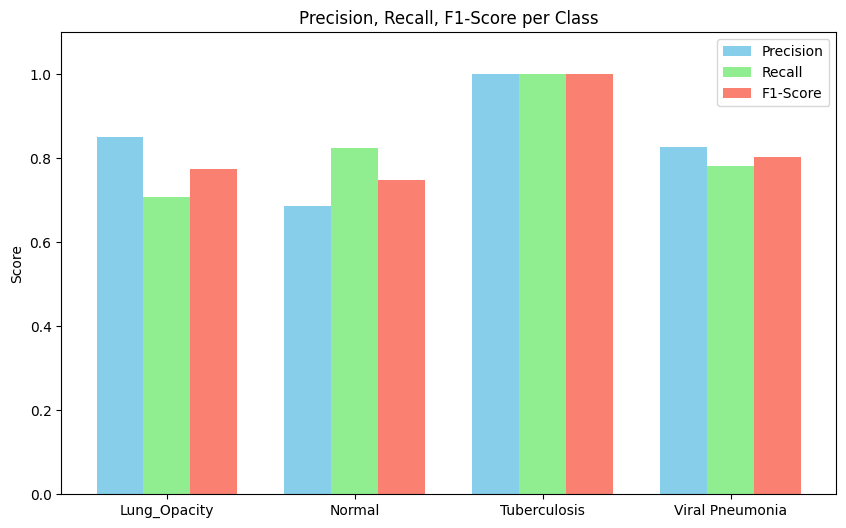

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# True and predicted labels
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Class names
class_names = list(test_generator.class_indices.keys())

# Classification report as dict
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Extract metrics
precision = [report[c]['precision'] for c in class_names]
recall = [report[c]['recall'] for c in class_names]
f1 = [report[c]['f1-score'] for c in class_names]
support = [report[c]['support'] for c in class_names]

# Overall accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Overall Accuracy: {accuracy:.2f}")

# Plot metrics
x = np.arange(len(class_names))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, precision, width, label='Precision', color='skyblue')
plt.bar(x, recall, width, label='Recall', color='lightgreen')
plt.bar(x + width, f1, width, label='F1-Score', color='salmon')

plt.xticks(x, class_names)
plt.ylim(0,1.1)
plt.ylabel('Score')
plt.title('Precision, Recall, F1-Score per Class')
plt.legend()
plt.show()


### Confusion Matrix

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


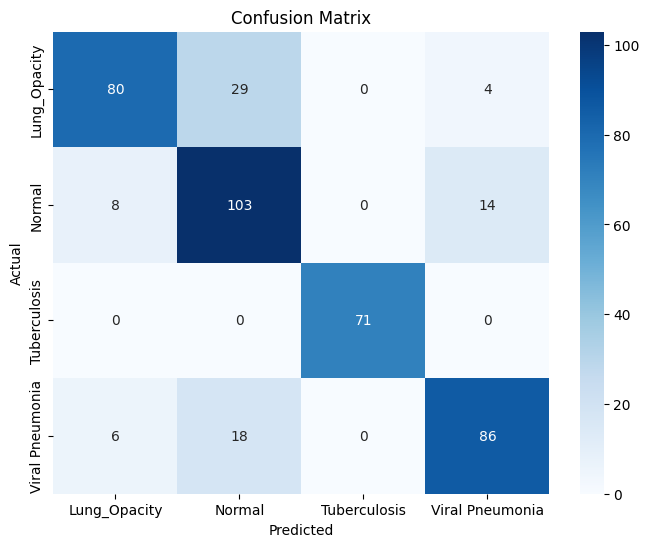

In [32]:
y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


#### Accuracy plot

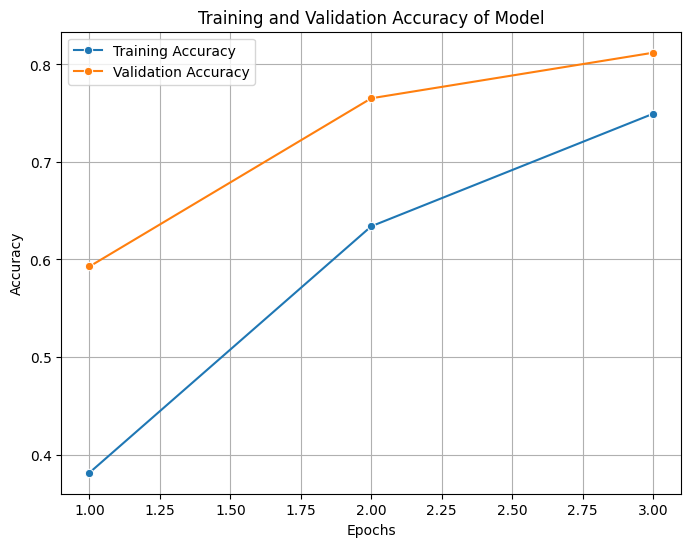

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare DataFrame from Keras history
df = pd.DataFrame({
    "Epoch": range(1, len(history.history['accuracy']) + 1),
    "Training Accuracy": history.history['accuracy'],
    "Validation Accuracy": history.history['val_accuracy']
})

# Melt DataFrame for Seaborn
df_melted = df.melt(id_vars="Epoch",
                   value_vars=["Training Accuracy", "Validation Accuracy"],
                   var_name="Type",
                   value_name="Accuracy")

plt.figure(figsize=(8,6))
sns.lineplot(data=df_melted, x="Epoch", y="Accuracy", hue="Type", marker="o")
plt.title('Training and Validation Accuracy of Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title="")
plt.show()

#### Loss Plot

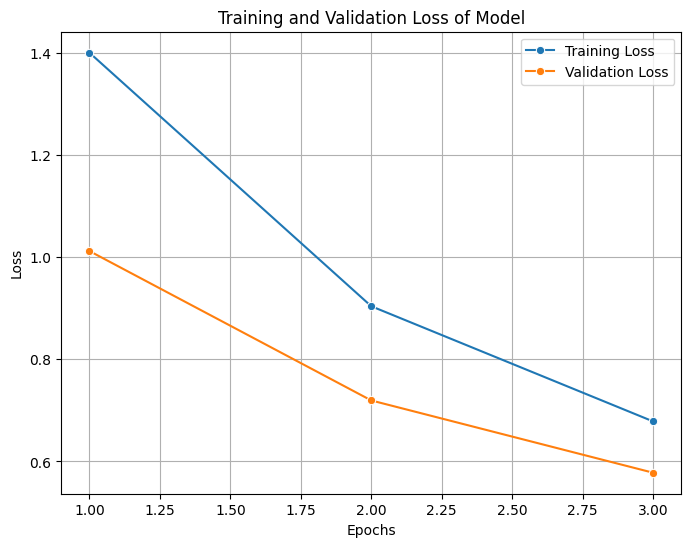

In [26]:
# Prepare DataFrame from Keras history for loss
df_loss = pd.DataFrame({
    "Epoch": range(1, len(history.history['loss']) + 1),
    "Training Loss": history.history['loss'],
    "Validation Loss": history.history['val_loss']
})

# Melt DataFrame for Seaborn
df_loss_melted = df_loss.melt(id_vars="Epoch",
                              value_vars=["Training Loss", "Validation Loss"],
                              var_name="Type",
                              value_name="Loss")

# Plot loss
plt.figure(figsize=(8,6))
sns.lineplot(data=df_loss_melted, x="Epoch", y="Loss", hue="Type", marker="o")
plt.title('Training and Validation Loss of Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(title="")
plt.show()